### Gender predictor using the first name

In [38]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import DictVectorizer

# change your path
path = 'path_csv'

file = os.path.join(path, "names_dataset.csv")
df_names = pd.read_csv(file,sep="," , index_col=None, header=0)
df_names.head(5)

,nome,sexo
0,Abagael,F
1,Abagail,F
2,Abbe,F
3,Abbey,F
4,Abbi,F


In [39]:
total_gender = df_names.groupby(['sexo'] ).size()
per = df_names.groupby(['sexo'] ).agg( 'size')/df_names['sexo'].count()

print('total gender\n', total_gender.head(2))
print('\npercent\n', per)

total gender
 sexo
F    124281
M     97410
dtype: int64

percent
 sexo
F    0.560605
M    0.439395
dtype: float64


In [40]:
# Replace F=0 and M=1

df_names['sexo'] = df_names['sexo'].map( {'F':0,'M':1} ).astype(int)

df_names['nome'] = df_names['nome'].apply(lambda x: str(x).lower())

df_names.head(5)

,nome,sexo
0,abagael,0
1,abagail,0
2,abbe,0
3,abbey,0
4,abbi,0


In [41]:


# By Analogy most female names ends in 'A' or 'E' or has the sound of 'A'
def features(name):
    name = name.lower()
    # create a dictionary
    return {
        'first-letter': name[0], # First letter
        'first2-letters': name[0:2], # First 2 letters
        'first3-letters': name[0:3], # First 3 letters
        'last-letter': name[-1], # Last letter
        'last2-letters': name[-2:],
        'last3-letters': name[-3:],
    }
# Vectorize the features function
features = np.vectorize(features)

In [42]:
def genderpredictor(a, model):
    if pd.notna(a):
        test_name1 = [a]
        transform_dv =dv.transform(features(test_name1))
        vector = transform_dv.toarray()
        if model.predict(vector) == 0:
            return "F"
        else:
            return "M"
    else:a

In [43]:
# Extract the features for the dataset
df_X = features(df_names['nome'])
df_X

array([{'first-letter': 'a', 'first2-letters': 'ab', 'first3-letters': 'aba', 'last-letter': 'l', 'last2-letters': 'el', 'last3-letters': 'ael'},
       {'first-letter': 'a', 'first2-letters': 'ab', 'first3-letters': 'aba', 'last-letter': 'l', 'last2-letters': 'il', 'last3-letters': 'ail'},
       {'first-letter': 'a', 'first2-letters': 'ab', 'first3-letters': 'abb', 'last-letter': 'e', 'last2-letters': 'be', 'last3-letters': 'bbe'},
       ...,
       {'first-letter': 'z', 'first2-letters': 'zh', 'first3-letters': 'zhi', 'last-letter': 'g', 'last2-letters': 'ng', 'last3-letters': 'eng'},
       {'first-letter': 'z', 'first2-letters': 'zi', 'first3-letters': 'zia', 'last-letter': 'n', 'last2-letters': 'an', 'last3-letters': 'aan'},
       {'first-letter': 'z', 'first2-letters': 'zi', 'first3-letters': 'zih', 'last-letter': 'r', 'last2-letters': 'ir', 'last3-letters': 'hir'}],
      dtype=object)

In [44]:
df_y = df_names['sexo']

In [57]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer()

name_test = features(['marcelo', 'ana', 'diego'])
# dict name_test
print('\ndict name_test:\n',name_test)

# Learn a list of feature name -> indices mappings.
dv.fit(name_test)

# Transform feature->value dicts to array or sparse matrix.
transformed = dv.transform(name_test)
print('\nDictVectorizer\n',transformed)


dict name_test:
 [{'first-letter': 'm', 'first2-letters': 'ma', 'first3-letters': 'mar', 'last-letter': 'o', 'last2-letters': 'lo', 'last3-letters': 'elo'}
 {'first-letter': 'a', 'first2-letters': 'an', 'first3-letters': 'ana', 'last-letter': 'a', 'last2-letters': 'na', 'last3-letters': 'ana'}
 {'first-letter': 'd', 'first2-letters': 'di', 'first3-letters': 'die', 'last-letter': 'o', 'last2-letters': 'go', 'last3-letters': 'ego'}]

DictVectorizer
   (0, 2)	1.0
  (0, 5)	1.0
  (0, 8)	1.0
  (0, 10)	1.0
  (0, 12)	1.0
  (0, 16)	1.0
  (1, 0)	1.0
  (1, 3)	1.0
  (1, 6)	1.0
  (1, 9)	1.0
  (1, 13)	1.0
  (1, 14)	1.0
  (2, 1)	1.0
  (2, 4)	1.0
  (2, 7)	1.0
  (2, 10)	1.0
  (2, 11)	1.0
  (2, 15)	1.0


In [58]:
# Returns a list of feature names, ordered by their indices.
dv.get_feature_names()

['first-letter=a',
 'first-letter=d',
 'first-letter=m',
 'first2-letters=an',
 'first2-letters=di',
 'first2-letters=ma',
 'first3-letters=ana',
 'first3-letters=die',
 'first3-letters=mar',
 'last-letter=a',
 'last-letter=o',
 'last2-letters=go',
 'last2-letters=lo',
 'last2-letters=na',
 'last3-letters=ana',
 'last3-letters=ego',
 'last3-letters=elo']

In [60]:
from sklearn.model_selection import train_test_split

# Train Test Split
dfX_train, dfX_test, dfy_train, dfy_test = train_test_split(df_X, df_y, test_size=0.33, random_state=42)

dv = DictVectorizer()
# Learn a list of feature name -> indices mappings and transform X.
dv.fit_transform(dfX_train)

<148532x9813 sparse matrix of type '<class 'numpy.float64'>'
	with 891192 stored elements in Compressed Sparse Row format>

In [61]:
# Model building Using DecisionTree

from sklearn.tree import DecisionTreeClassifier
 
dclf = DecisionTreeClassifier()
my_xfeatures =dv.transform(dfX_train)
dclf.fit(my_xfeatures, dfy_train)

DecisionTreeClassifier()

0.9022950012985416
Accuracy Model : 90.23% 
roc_auc Model : 90.00% 
precision Model : 89.39% 
recall Model : 88.18% 


Text(0.5, 1.05, 'Confusion_matrix')

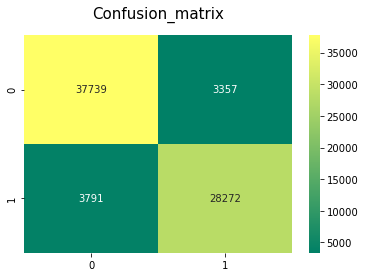

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, precision_score, recall_score, roc_auc_score, accuracy_score, confusion_matrix

# Accuracy on test set
print(dclf.score(dv.transform(dfX_test), dfy_test))

y_pred_dclf = dclf.predict(dv.transform(dfX_test))

result_dclf = accuracy_score(dfy_test, y_pred_dclf)*100
print("Accuracy Model : %.2f%% " % result_dclf)

result_dclf = roc_auc_score(dfy_test, y_pred_dclf)*100
print("roc_auc Model : %.2f%% " % result_dclf)

result_dclf = precision_score(dfy_test, y_pred_dclf)*100
print("precision Model : %.2f%% " % result_dclf)

result_dclf = recall_score(dfy_test, y_pred_dclf)*100
print("recall Model : %.2f%% " % result_dclf)

sns.heatmap(confusion_matrix(dfy_test,y_pred_dclf),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

In [65]:
# best parameters 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction

kfold = KFold(n_splits=10, random_state=42)

C:\Users\monitora\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [68]:
parameters = {    
    'max_depth':[20, 50, 80, 100, 150, 200],
    'max_features':['auto','sqrt','log2'],
    'criterion':['gini','entropy'],
    'max_leaf_nodes': [5,7,10,15,20, 50], 
    'min_samples_split': [5,7,10, 20, 50]
}

dt = DecisionTreeClassifier(random_state=42, max_depth=100)

dt_gs = GridSearchCV(dt,param_grid = parameters, cv=kfold, scoring="accuracy")

my_xfeatures =dv.transform(dfX_train)
dt_gs.fit(my_xfeatures, dfy_train)


# Best score
param_dt_gs = dt_gs.best_estimator_
result_dt_gs = dt_gs.best_score_*100
print("Accuracy CV : %.2f%% " % (result_dt_gs))

print('Best Estimators: ',dt_gs.best_estimator_)
print('Best hyperparameters (extern): ', dt_gs.best_params_)

Accuracy CV : 76.16% 
Best Estimators:  DecisionTreeClassifier(criterion='entropy', max_depth=50, max_features='auto',
                       max_leaf_nodes=50, min_samples_split=5, random_state=42)
Best hyperparameters (extern):  {'criterion': 'entropy', 'max_depth': 50, 'max_features': 'auto', 'max_leaf_nodes': 50, 'min_samples_split': 5}


In [ ]:
from sklearn.ensemble import RandomForestClassifier

parameters = {    
    'n_estimators':[1000, 1500],
    'max_depth':[100, 150, 200],
    'max_features':['auto','sqrt','log2'],
    'criterion':['gini','entropy']
}
rf = RandomForestClassifier(random_state=42, max_depth=100, n_estimators = 1000)

rf_gs = GridSearchCV(rf,param_grid = parameters, cv=kfold, scoring="accuracy")

my_xfeatures =dv.transform(dfX_train)
rf_gs.fit(my_xfeatures, dfy_train)


# Best score
param_rf_gs = rf_gs.best_estimator_
result_rf_gs = rf_gs.best_score_*100
print("Accuracy CV : %.2f%% " % (result_rf_gs))

print('Best Estimators: ',rf_gs.best_estimator_)
print('Best hyperparameters (extern): ', rf_gs.best_params_)